# Messi data exploration

Written report for this analysis can be found [here](../reports/messi_01_finding_leo.md)

In [1]:
import pandas as pd

In [2]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from src import utilities

In [4]:
df = utilities.get_master("events_shot")
df.shape

(12003, 22)

In [5]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,12003,NaN,NaN,NaN,6001,3465.11,0,3000.5,6001,9001.5,12002
season_id,12003,NaN,NaN,NaN,23.7796,13.6433,1,21,25,38,42
country_name,12003,1,Spain,12003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
competition_name,12003,1,La Liga,12003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season_name,12003,16,2017/2018,972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
match_id,12003,NaN,NaN,NaN,128067,104482,9575,69139,69292,266320,303731
match_date,12003,485,2018-10-20,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kick_off,12003,23,20:00:00.000,2194,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,12003,NaN,NaN,NaN,23.7796,13.6433,1,21,25,38,42
event_type,12003,1,shot,12003,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
total_matches = len(df.match_date.unique())
total_matches

485

In [7]:
messi_fullname = "Lionel AndrÃ©s Messi Cuccittini"
messi_fullname

'Lionel AndrÃ©s Messi Cuccittini'

In [8]:
df["shot"] = 1
df["goal"] = 0
df.loc[df.outcome == "Goal", "goal"] = 1

df["shot_skill_diff"] = df.goal - df.statsbomb_xg

df["is_Messi"] = (df.player == messi_fullname)
df["month"] = df.match_date.str.split("-", expand=True)[1]
df["10_minute_bin"] = df.minute.round(-1)

df["start_location_x_bin"] = 5 * (df.start_location_x / 5).round()
df["start_location_y_bin"] = 5 * (df.start_location_y / 5).round()

df["end_location_y_bin"] = 4 * (df.end_location_y / 4).round()
df["end_location_z_bin"] = 1 * (df.end_location_z / 1).round()

df.iloc[:, -10:].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
shot,12003,NaN,NaN,NaN,1,0,1,1,1,1,1
goal,12003,NaN,NaN,NaN,0.137049,0.343913,0,0,0,0,1
shot_skill_diff,12003,NaN,NaN,NaN,0.0120991,0.299885,-0.871731,-0.0959426,-0.0408092,-0.0183419,0.990624
is_Messi,12003,2,False,9841,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,12003,12,02,1511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10_minute_bin,12003,NaN,NaN,NaN,47.7764,26.5068,0,20,50,70,100
start_location_x_bin,12003,NaN,NaN,NaN,103.837,9.02052,45,100,105,110,120
start_location_y_bin,12003,NaN,NaN,NaN,39.3693,10.2177,0,30,40,45,80
end_location_y_bin,12003,NaN,NaN,NaN,39.8547,6.9731,0,36,40,44,80
end_location_z_bin,8940,NaN,NaN,NaN,1.6236,1.85014,0,0,1,2,8


In [9]:
## shots, goals, xg, efficiency, skill
summary = df.groupby(["is_Messi", "match_date"])[["shot", "goal", "statsbomb_xg", "shot_skill_diff"]].sum()\
            .sum(level="is_Messi") / total_matches
summary["shot_skill_%"] = summary.goal / summary.statsbomb_xg
summary["shot_efficiency_%"] = summary.goal / summary.shot
summary.sort_index(ascending=False).T

is_Messi,True,False
shot,4.457732,20.290722
goal,0.915464,2.476289
statsbomb_xg,0.700319,2.392000
shot_skill_diff,0.215145,0.084289
shot_skill_%,1.307210,1.035238
shot_efficiency_%,0.205365,0.122040


In [10]:
## volume
print("Messi take {0:.1f}% of all shots taken in these matches".format(100 * summary.iloc[1, 0] / summary.shot.sum()))

Messi take 18.0% of all shots taken in these matches


## Trends over time

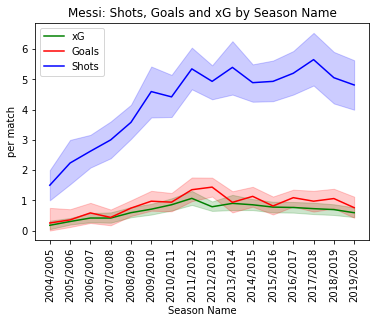

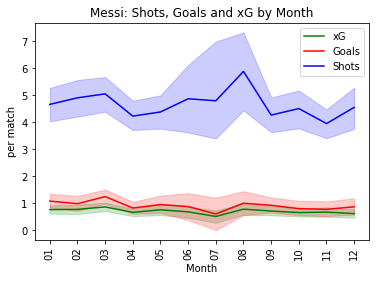

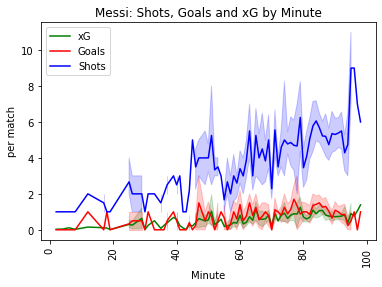

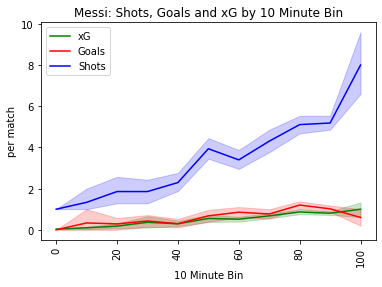

In [11]:
for x_col in ["season_name", "month", "minute", "10_minute_bin"]:
    x_disp = x_col.title().replace("_", " ")
    x_agg = "mean"
    x_data = df[df.is_Messi].groupby("match_date").agg({x_col: max,
                                                       "statsbomb_xg": sum,
                                                       "goal": sum,
                                                       "shot": sum,}).sort_values(by=x_col)

    ax = sns.lineplot(data=x_data, x=x_col, y="statsbomb_xg", estimator=x_agg, color="g")
    ax.set(xlabel=x_disp, ylabel='per match')
    plt.setp(ax.get_xticklabels(), rotation=90)

    sns.lineplot(data=x_data, x=x_col, y="goal", estimator=x_agg, color="r")
    sns.lineplot(data=x_data, x=x_col, y="shot", estimator=x_agg, color="b")

    ax.legend(handles=ax.lines, labels=["xG","Goals","Shots"])
    plt.title("Messi: Shots, Goals and xG by {1}".format(x_agg, x_disp))

    plt.show()

## Where shots are taken from

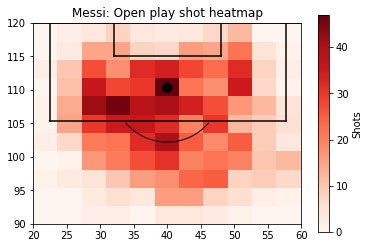

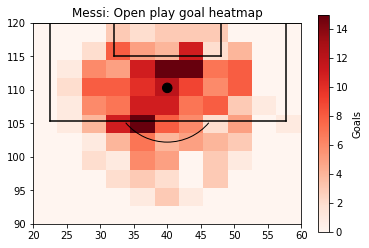

In [12]:
for metric_col in ["shot", "goal"]:
    data = df[(df.is_Messi) & (df.type == "Open Play") & (df[metric_col] == 1)]

    plt.hist2d(data.start_location_y, data.start_location_x, bins=11, range=[[20, 60], [90, 120]], cmap="Reds")
#     plt.hexbin(data.start_location_y, data.start_location_x, gridsize=13, cmap="Reds")
#     sns.jointplot(x="start_location_y", y="start_location_x", data=data, kind="hex")

    cb = plt.colorbar()
    cb.set_label("{0}s".format(metric_col.title()))

    ax = plt.gca()
    ax.set_aspect('equal')
    utilities.draw_pen_box(ax)

    plt.title("Messi: Open play {0} heatmap".format(metric_col))
    plt.show()

In [13]:
def plot_contour_map(data, title, cmap, plot_type="contour", plot_elevation="pitch", plot_range=[[20, 60], [90, 120]]):
    x = data.columns
    y = data.index
    z = data.values
    data_extent = [x.min(), x.max(), y.min(), y.max()]
#     print(data_extent)

    if plot_type == "contour":
        plt.contour(x, y, z, 10, cmap=cmap)
    elif plot_type == "contourf":
        plt.contourf(x, y, z, 10, cmap=cmap)
    elif plot_type == "imshow":
        plt.imshow(z, extent=data_extent, origin="lower", cmap=cmap)

#     cb = 
    plt.colorbar()
#     cb.set_label("{0}".format(metric_col))

    ax = plt.gca()
    ax.set_aspect('equal')
    
    if plot_elevation == "goal":
        utilities.draw_posts(ax)
    else:
        utilities.draw_pen_box(ax)

    plt.xlim(plot_range[0])
    plt.ylim(plot_range[1])
    plt.title(title)
    plt.show() 

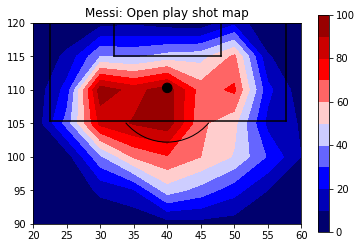

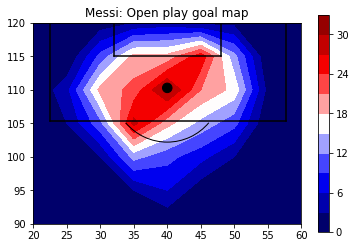

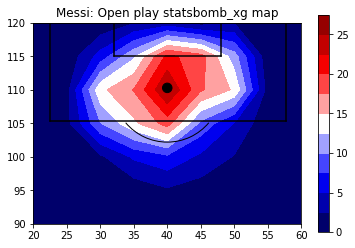

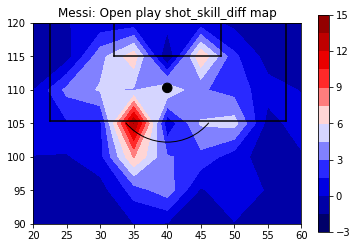

In [14]:
plot_type = "contourf"
cmap = "seismic" #coolwarm

for metric_col in ["shot", "goal", "statsbomb_xg", "shot_skill_diff"]:
    data = df[(df.is_Messi) & (df.type == "Open Play")]\
            .groupby(["start_location_x_bin", "start_location_y_bin"])[metric_col].sum().unstack().fillna(0)
    
    title = "Messi: Open play {0} map".format(metric_col)
    
    plot_contour_map(data, title, cmap, plot_type)

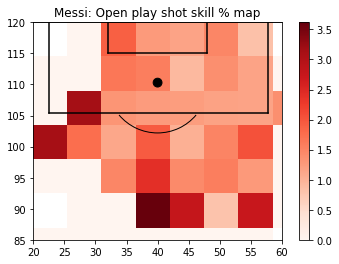

In [15]:
plot_type = "imshow"
cmap = "Reds" #coolwarm

data = df[(df.is_Messi) & (df.type == "Open Play")]\
            .groupby(["start_location_x_bin", "start_location_y_bin"])["goal"].sum().unstack().fillna(0)\
    / df[(df.is_Messi) & (df.type == "Open Play")]\
            .groupby(["start_location_x_bin", "start_location_y_bin"])["statsbomb_xg"].sum().unstack().fillna(0)
    
title = "Messi: Open play shot skill % map"

plot_contour_map(data, title, cmap, plot_type, plot_range=[[20, 60], [85, 120]])

## Where shots end up

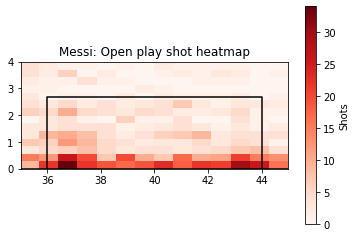

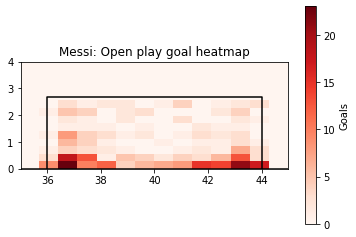

In [16]:
for metric_col in ["shot", "goal"]:
    data = df[(df.is_Messi) & (df.type == "Open Play") & (df[metric_col] == 1)].dropna(subset=["end_location_z"])

    plt.hist2d(data.end_location_y, data.end_location_z, bins=14, range=[[35, 45], [0, 4]], cmap="Reds")
#     plt.hexbin(data.end_location_y, data.end_location_z, gridsize=17, cmap="Reds")
#     g = sns.jointplot(x="start_location_y", y="start_location_x", data=data, kind="hex")

    cb = plt.colorbar()
    cb.set_label("{0}s".format(metric_col.title()))

    ax = plt.gca()
    ax.set_aspect('equal')
    utilities.draw_posts(ax)

    plt.title("Messi: Open play {0} heatmap".format(metric_col))
    plt.show()

In [17]:
# plot_type = "contourf"
# cmap = "Reds" #coolwarm

# for metric_col in [#"shot", "goal", "statsbomb_xg", 
#     "shot_skill_diff"]:
#     data = df[(df.is_Messi) & (df.type == "Open Play")]\
#             .groupby(["end_location_z_bin", "end_location_y_bin"])[metric_col].sum().unstack().fillna(0)
    
#     title = "Messi: Open play {0} map".format(metric_col)
    
#     plot_contour_map(data, title, cmap, plot_type, plot_elevation="goal", plot_range=[[25, 55], [0, 4]])

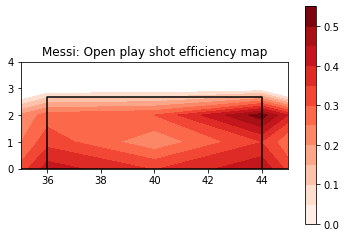

In [18]:
plot_type = "contourf"
cmap = "Reds" #coolwarm

data = (df[(df.is_Messi) & (df.type == "Open Play")]\
            .groupby(["end_location_z_bin", "end_location_y_bin"])["goal"].sum().unstack().fillna(0)\
    / df[(df.is_Messi) & (df.type == "Open Play")]\
            .groupby(["end_location_z_bin", "end_location_y_bin"])["shot"].sum().unstack().fillna(1))#\
#     - (df[(~df.is_Messi) & (df.type == "Open Play")]\
#             .groupby(["end_location_z_bin", "end_location_y_bin"])["goal"].sum().unstack().fillna(0)\
#     / df[(~df.is_Messi) & (df.type == "Open Play")]\
#             .groupby(["end_location_z_bin", "end_location_y_bin"])["shot"].sum().unstack().fillna(0))
    
title = "Messi: Open play shot efficiency map"

plot_contour_map(data, title, cmap, plot_type, plot_elevation="goal", plot_range=[[35, 45], [0, 4]])

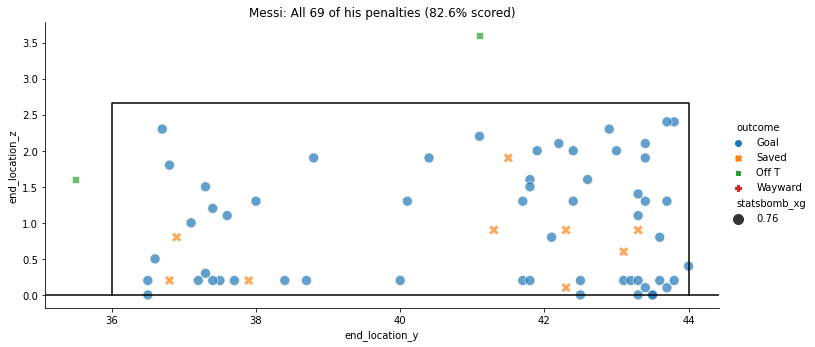

In [19]:
pens = df[(df.is_Messi) & (df.type == "Penalty")]

sns.relplot(x='end_location_y', y='end_location_z', size='statsbomb_xg', style="outcome", hue="outcome",
            sizes=(100, 400), alpha=.7, height=10, #aspect=2, 
                data=pens)

ax = plt.gca()
ax.set_aspect('equal')
utilities.draw_posts(ax)
pens_perc = 100 * pens[pens.outcome == "Goal"].shape[0] / pens.shape[0]
plt.title("Messi: All {0} of his penalties ({1:.1f}% scored)".format(pens.shape[0], pens_perc))
plt.show()